## **Working with Linear Regression**

## Step 1: Data Preparation

- Import the required libraries
- Load the Boston housing data set
- Prepare the data set


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
#import seaborn as sns
from sklearn import datasets

## Step 2: Create a DataFrame and Check for Missing Values

- Create a DataFrame using the Boston housing data
- Display basic statistics
- Check for missing values


In [9]:
df = pd.DataFrame(pd.read_csv('housing.csv'))
df.head()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
0,0.00632,18.0,2.31,0,0.538,6.575,65.2,4.0900,1,296.0,15.3,396.90,4.98,24.0
1,0.02731,0.0,7.07,0,0.469,6.421,78.9,4.9671,2,242.0,17.8,396.90,9.14,21.6
2,0.02729,0.0,7.07,0,0.469,7.185,61.1,4.9671,2,242.0,17.8,392.83,4.03,34.7
3,0.03237,0.0,2.18,0,0.458,6.998,45.8,6.0622,3,222.0,18.7,394.63,2.94,33.4
4,0.06905,0.0,2.18,0,0.458,7.147,54.2,6.0622,3,222.0,18.7,396.90,5.33,36.2


__Observation__:

- This is the head of the data set.

In [10]:
df.describe()

,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT,MEDV
count,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000,506.000000
mean,3.613524,11.363636,11.136779,0.069170,0.554695,6.284634,68.574901,3.795043,9.549407,408.237154,18.455534,356.674032,12.653063,22.532806
std,8.601545,23.322453,6.860353,0.253994,0.115878,0.702617,28.148861,2.105710,8.707259,168.537116,2.164946,91.294864,7.141062,9.197104
min,0.006320,0.000000,0.460000,0.000000,0.385000,3.561000,2.900000,1.129600,1.000000,187.000000,12.600000,0.320000,1.730000,5.000000
25%,0.082045,0.000000,5.190000,0.000000,0.449000,5.885500,45.025000,2.100175,4.000000,279.000000,17.400000,375.377500,6.950000,17.025000
50%,0.256510,0.000000,9.690000,0.000000,0.538000,6.208500,77.500000,3.207450,5.000000,330.000000,19.050000,391.440000,11.360000,21.200000
75%,3.677083,12.500000,18.100000,0.000000,0.624000,6.623500,94.075000,5.188425,24.000000,666.000000,20.200000,396.225000,16.955000,25.000000
max,88.976200,100.000000,27.740000,1.000000,0.871000,8.780000,100.000000,12.126500,24.000000,711.000000,22.000000,396.900000,37.970000,50.000000


__Observation__:
- Here, you can see the statistical analysis of the data set.

In [11]:
df.isna().sum()

CRIM        0
 ZN         0
 INDUS      0
 CHAS       0
 NOX        0
 RM         0
 AGE        0
 DIS        0
 RAD        0
 TAX        0
 PTRATIO    0
 B          0
 LSTAT      0
MEDV        0
dtype: int64

__Observation__:

- There are no empty rows in the data set

## Step 3: Remove Outliers from the HousePrice Column


- Use a boxplot to visualize the outliers
- Remove outliers from the __HousePrice__ column using the 1% and 99% quantiles


<Axes: xlabel='MEDV'>

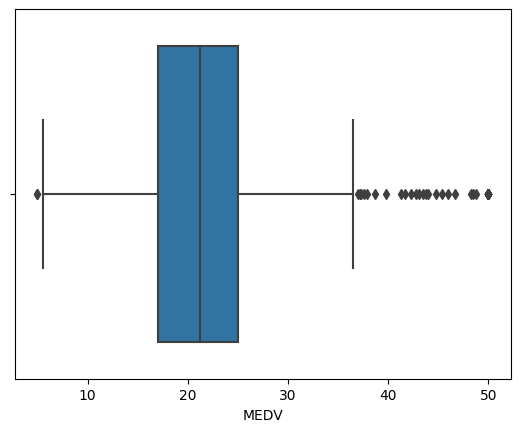

In [14]:
import seaborn as sns
sns.boxplot(x=df['MEDV'])

__Observation__:

- There are outliers in the data set.

In [15]:
upper_limit = df['MEDV'].quantile(0.95)
lower_limit = df['MEDV'].quantile(0.03)

In [ ]:
df['MEDV'] = np.where(df['MEDV'] < lower_limit, lower_limit, df['MEDV'])
df['MEDV'] = np.where(df['MEDV'] > upper_limit, upper_limit, df['MEDV'])

In [ ]:
# or use the following
mask = (df['MEDV'] < upper_limit) & (df['MEDV'] > lower_limit)

df = df[mask]

43.4

## Step 4: Test for Linearity of the Model
- Most people will jump straight to demploying a LinearRegression Model. But it's always a good idea to check the linearity and get a comprehensive report using `statsmodels`
- It'll basically explain how good of a fit your model is.
- steps
    - Fit the model and display the summary
    - Define functions to calculate residuals and plot actual vs. predicted values
    - Test for linearity


In [16]:
import statsmodels.api as sm
#split the data
X = df.drop(columns='MEDV')
y = df['MEDV']


`add_constant` is a function in the statsmodels.tools.tools module that adds a column of ones to an array-like input. This column represents a constant or an intercept term in the linear model. A constant or an intercept term is a coefficient that represents the value of the dependent variable when all the independent variables are zero. It is usually included in the model to improve the fit and interpretation of the model.

In [18]:
#define a constant
X_constant = sm.add_constant(X)


In [21]:
OLS_model = sm.OLS(y, X_constant).fit()
OLS_model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.741
Model:                            OLS   Adj. R-squared:                  0.734
Method:                 Least Squares   F-statistic:                     108.1
Date:                Thu, 18 Jan 2024   Prob (F-statistic):          6.72e-135
Time:                        20:36:37   Log-Likelihood:                -1498.8
No. Observations:                 506   AIC:                             3026.
Df Residuals:                     492   BIC:                             3085.
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         36.4595      5.103      7.144      0.000      26.432      46.487
CRIM          -0.1080      0.033     -3.287      0.001      -0.173      -0.043
 ZN            0.0464      0.014      3.382      0.001       0.019       0.073
 INDUS         0.0206      0.061      0.334      0.738      -0.100       0.141
 CHAS          2.6867      0.862      3.118      0.002       0.994       4.380
 NOX         -17.7666      3.820     -4.651      0.000     -25.272     -10.262
 RM            3.8099      0.418      9.116      0.000       2.989       4.631
 AGE           0.0007      0.013      0.052      0.958      -0.025       0.027
 DIS          -1.4756      0.199     -7.398      0.000      -1.867      -1.084
 RAD           0.3060      0.066      4.613      0.000       0.176       0.436
 TAX          -0.0123      0.004     -3.280      0.001      -0.020      -0.005
 PTRATIO      -0.9527      0.131     -7.283      0.000      -1.210      -0.696
 B             0.0093      0.003      3.467      0.001       0.004       0.015
 LSTAT        -0.5248      0.051    -10.347      0.000      -0.624      -0.425
==============================================================================
Omnibus:                      178.041   Durbin-Watson:                   1.078
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              783.126
Skew:                           1.521   Prob(JB):                    8.84e-171
Kurtosis:                       8.281   Cond. No.                     1.51e+04
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 1.51e+04. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

In Ordinary Least Squares (OLS) regression using `statsmodels` in Python, several metrics are crucial for assessing the goodness of fit and the performance of the regression model. Here are some of the most important metrics:

1. **R-squared (`rsquared`):**
   - **Purpose:** Measures the proportion of the variance in the dependent variable explained by the independent variables.
   - **Interpretation:** Ranges from 0 to 1. Higher values indicate a better fit. A value of 1 means that the model explains all the variability, while 0 means it doesn't explain any.

   ```python
   print("R-squared:", model.rsquared)
   ```

2. **Adjusted R-squared (`rsquared_adj`):**
   - **Purpose:** Similar to R-squared but adjusts for the number of predictors in the model.
   - **Interpretation:** It penalizes the model for adding irrelevant predictors, making it a more reliable metric for models with different numbers of predictors.

   ```python
   print("Adjusted R-squared:", model.rsquared_adj)
   ```

3. **F-statistic (`fvalue`):**
   - **Purpose:** Tests the overall significance of the model.
   - **Interpretation:** A higher F-statistic suggests that the model is statistically significant.

   ```python
   print("F-statistic:", model.fvalue)
   ```

4. **Prob (F-statistic) (`f_pvalue`):**
   - **Purpose:** Provides the probability that the null hypothesis (the model is not significant) is true.
   - **Interpretation:** A small p-value (typically < 0.05) suggests that the model is statistically significant.

   ```python
   print("Prob (F-statistic):", model.f_pvalue)
   ```

5. **AIC (Akaike Information Criterion) (`aic`):**
   - **Purpose:** A measure of the model's goodness of fit that penalizes the number of parameters.
   - **Interpretation:** Lower values indicate a better fit.

   ```python
   print("AIC:", model.aic)
   ```

6. **BIC (Bayesian Information Criterion) (`bic`):**
   - **Purpose:** Similar to AIC but uses a stronger penalty for the number of parameters.
   - **Interpretation:** Like AIC, lower values are better.

   ```python
   print("BIC:", model.bic)
   ```

7. **Standard Errors (`bse`):**
   - **Purpose:** Provides the standard errors of the coefficient estimates.
   - **Interpretation:** Smaller standard errors indicate more precise estimates.

   ```python
   print("Standard Errors:", model.bse)
   ```

8. **P-values (`pvalues`):**
   - **Purpose:** Tests the null hypothesis that each coefficient is equal to zero.
   - **Interpretation:** Small p-values (< 0.05) suggest that the corresponding coefficients are statistically significant.

   ```python
   print("P-values:", model.pvalues)
   ```

These metrics collectively help you understand how well your OLS regression model fits the data, whether the model is statistically significant, and if any of the predictors contribute significantly to the model. It's important to consider these metrics in conjunction and use them to make informed decisions about your model's performance.

- Define a function to calculate residual values by taking the actual and predicted values
- The value of residuals is equal to the difference between the actual and  predicted values.  

In [ ]:
def calculate_residuals(model, features, label):
    predictions =  model.predict(features)
    df_results = pd.DataFrame({'Actual' : label, 'Predicted' : predictions})
    df_results['Residuals'] = abs(df_results['Actual']) - abs(df_results['Predicted'])
    return df_results

- Next, define a function to plot the actual and predicted values using __lmplot__.
- The orange line will show the fitted line created by the linear regression model.

In [ ]:
def linear_assumptions(model, features, label):
    df_results = calculate_residuals(model, features, label)
    
    sns.lmplot(x='Actual', y='Predicted', data=df_results, fit_reg=False, size=7)
    line_coords = np.arange(df_results.min().min(), df_results.max().max())
    plt.plot(line_coords, line_coords, color='darkorange', linestyle='--')
    plt.title('Actual vs. Predicted')
    plt.show()

- Now, run the function __linear_assumptions__ to show the graph with the model as __boston_model__, features as __boston.data__, and label as __boston.taget__ variables as arguments.

/usr/local/lib/python3.7/site-packages/seaborn/regression.py:581: UserWarning: The `size` parameter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


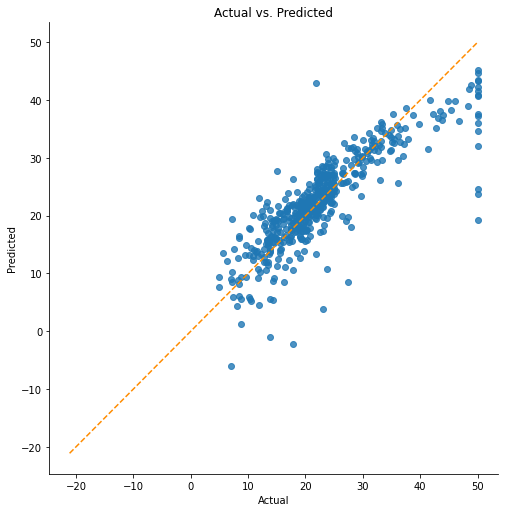

In [ ]:
linear_assumptions(boston_model, boston.data, boston.target)

__Observation__:

- We can observe that the line does not represent all the data points.

## Step 5: Check for Multicollinearity

- Let's check the correlation between the variables in the data set.



tutorial: https://seaborn.pydata.org/examples/many_pairwise_correlations.html

<Axes: >

<Figure size 1000x800 with 0 Axes>

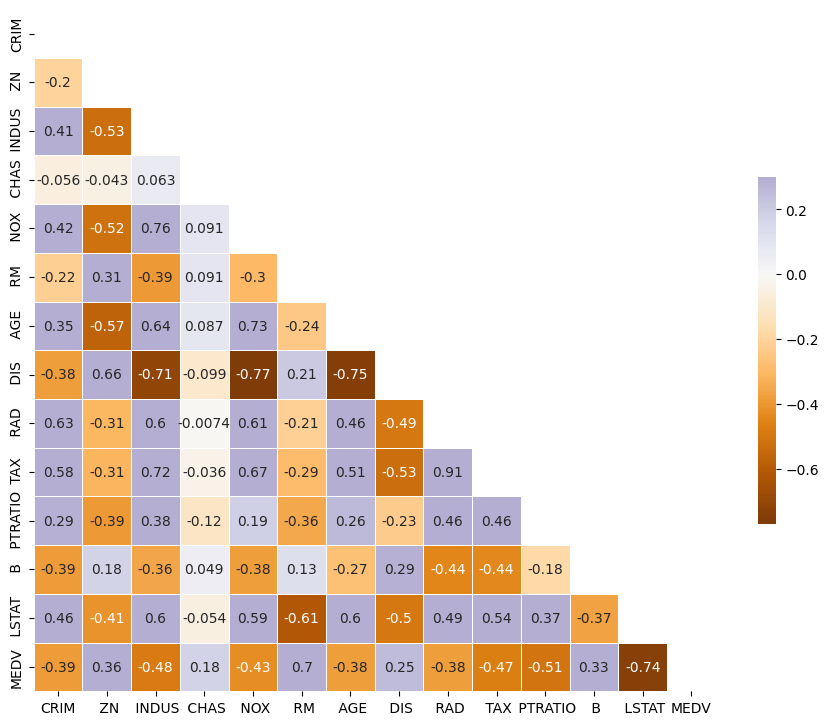

In [32]:
corr = df.corr()
plt.figure(figsize=(10,8))
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
#cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap='PuOr', vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

### VIF

- The Variance Inflation Factor (VIF) is a measure used in regression analysis to assess the extent of multicollinearity among predictor variables within a model. 
- Multicollinearity occurs when two or more independent variables in a regression model are highly correlated, making it difficult to separate their individual effects on the dependent variable. 
- VIF quantifies how much the variance of an estimated regression coefficient is increased due to multicollinearity.

Here's how VIF is interpreted:

- **VIF = 1:** No multicollinearity. The variance of the estimated regression coefficient is not inflated.
- **VIF > 1:** Some degree of multicollinearity. The variance of the estimated coefficient is inflated by a factor proportional to the VIF.

In practical terms:

- A VIF of 1 indicates no correlation among predictors.
- A VIF between 1 and 5 suggests moderate correlation, but it is generally considered acceptable.
- A VIF above 5 indicates high correlation and potential multicollinearity issues.

**How to Use VIF:**

1. **Calculate VIF:**
   - For each predictor variable in your regression model, calculate its VIF using the formula mentioned above.

2. **Check VIF Values:**
   - Examine the VIF values for each predictor. If any VIF is significantly high (usually above 5 or 10, depending on conventions), it suggests multicollinearity.

3. **Address Multicollinearity:**
   - If high VIF values are detected, consider taking corrective actions such as:
     - Dropping one of the highly correlated variables.
     - Combining or transforming variables.
     - Using regularization techniques (e.g., Ridge Regression) that automatically handle multicollinearity.

4. **Reassess Model:**
   - After addressing multicollinearity, reevaluate your regression model. The goal is to have a model with low VIF values, indicating that the predictor variables provide unique information to the model.

**Python Example using `statsmodels`:**

```python
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor

# Assuming X is your design matrix (features)
vif_data = pd.DataFrame()
vif_data["Variable"] = X.columns
vif_data["VIF"] = [variance_inflation_factor(X.values, i) for i in range(X.shape[1])]

print(vif_data)
```

In this example, `X` is your design matrix, and the VIF values for each predictor variable are calculated using the `variance_inflation_factor` function from `statsmodels`.

- Calculate the variance inflation factor (VIF) for each feature
- Import the __variance_inflation_factor__ module from the __statsmodels.stats.outliers_influence__ library
- Set the features as the DataFrame, except the target variable
- Assign the __vif_data__ to the feature columns

In [41]:
from statsmodels.stats.outliers_influence import variance_inflation_factor
x = df.drop(['MEDV'], axis =1 )
vif_data = pd.DataFrame()
vif_data['Features'] = x.columns

vif_data['vif'] = [variance_inflation_factor(x.values, i) for i in range(len(x.columns))]
print(vif_data)

   Features        vif
0      CRIM   2.100373
1        ZN   2.844013
2     INDUS  14.485758
3      CHAS   1.152952
4       NOX  73.894947
5        RM  77.948283
6       AGE  21.386850
7       DIS  14.699652
8       RAD  15.167725
9       TAX  61.227274
10  PTRATIO  85.029547
11        B  20.104943
12    LSTAT  11.102025


__Observation__:
- From the above output, we can infer that the columns **NOX, RM, AGE,** and **PTRATIO** have higher multicollinearity. Hence, we can drop them. 

## Step 6: Remove Multicollinear Features and Split the Data set

- Remove highly multicollinear features from the data set


In [42]:
df.columns = df.columns.str.replace(' ', '')
df.columns

Index(['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD', 'TAX',
       'PTRATIO', 'B', 'LSTAT', 'MEDV'],
      dtype='object')

In [47]:
#df1 = df.drop(['NOX', 'RM', 'AGE', 'PTRATIO'], axis = 1)
df1 = df.drop(['NOX', 'RM'], axis = 1)

- Now, set the feature and target variables.

In [48]:
x = df1.drop(['MEDV'], axis =1)
y = df1['MEDV']

- Next, split the data into train and test sets.

In [49]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test  = train_test_split(x, y, random_state=0, test_size=0.25)


## Step 7: Fit the Model and Evaluate Performance

- Fit the model using OLS and display the summary.


In [50]:
X_train_constant = sm.add_constant(X_train)
model = sm.OLS(y_train, X_train_constant).fit()
model.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:                   MEDV   R-squared:                       0.718
Model:                            OLS   Adj. R-squared:                  0.709
Method:                 Least Squares   F-statistic:                     84.80
Date:                Thu, 18 Jan 2024   Prob (F-statistic):           1.19e-93
Time:                        21:04:03   Log-Likelihood:                -1140.7
No. Observations:                 379   AIC:                             2305.
Df Residuals:                     367   BIC:                             2353.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         57.4828      3.114     18.458      0.000      51.359      63.607
CRIM          -0.1016      0.041     -2.459      0.014      -0.183      -0.020
ZN             0.0705      0.016      4.340      0.000       0.039       0.102
INDUS         -0.1325      0.071     -1.875      0.062      -0.271       0.006
CHAS           2.7220      1.061      2.564      0.011       0.635       4.809
AGE           -0.0029      0.016     -0.188      0.851      -0.033       0.028
DIS           -1.4993      0.237     -6.334      0.000      -1.965      -1.034
RAD            0.2690      0.078      3.451      0.001       0.116       0.422
TAX           -0.0147      0.004     -3.283      0.001      -0.023      -0.006
PTRATIO       -0.9444      0.150     -6.302      0.000      -1.239      -0.650
B              0.0065      0.003      1.962      0.051   -1.57e-05       0.013
LSTAT         -0.7731      0.053    -14.542      0.000      -0.878      -0.669
==============================================================================
Omnibus:                       87.511   Durbin-Watson:                   2.032
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              189.778
Skew:                           1.184   Prob(JB):                     6.17e-42
Kurtosis:                       5.531   Cond. No.                     6.79e+03
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 6.79e+03. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

- You're basically reducing the ability to predict better to trade off soe coeficients
- because with a  high score and multicollinearity it's hard to derive coefficients

In [ ]:
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score
from sklearn import linear_model

- Now, fit the model using linear regression.


In [ ]:
reg = linear_model.LinearRegression()
reg.fit(X_train, y_train)
y_pred_train = reg.predict(X_train)
y_pred_test = reg.predict(X_test)

- Evaluate the model using various metrics such as the **r2_score, mean_absolute_error, and mean_squared_error**

In [ ]:
print("R Square: {}".format(r2_score(y_train, y_pred_train)))
print("MAE: {}".format(mean_absolute_error(y_train, y_pred_train)))
print("MSE: {}".format(mean_squared_error(y_train, y_pred_train)))

R Square: 0.6857716700262139
MAE: 3.766238016784234
MSE: 26.676235416618063


__Observation__:

- From the above output, we can observe that the model is a moderate fit for the given data.

In [ ]:
print("R Square: {}".format(r2_score(y_test, y_pred_test)))
print("MAE: {}".format(mean_absolute_error(y_test, y_pred_test)))
print("MSE: {}".format(mean_squared_error(y_test, y_pred_test)))

R Square: 0.5257075212801087
MAE: 4.179321963752527
MSE: 38.58065185545448


__Observation__:

- The model moderately explains the testing data, as indicated by the **R** **Square** value. 

In [ ]:
##

In [ ]:
import pandas as pd
from sklearn.datasets import load_boston  # Example dataset from sklearn
from sklearn.model_selection import GridSearchCV, train_test_split
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.svm import SVR  # Add SVM for regression
from sklearn.linear_model import SGDRegressor  # Add SGD for regression
from sklearn.metrics import mean_squared_error

# ... (rest of the code as before)

# 3. Define models and hyperparameter grids (updated)
models = [
    {"name": "LinearRegression", "model": LinearRegression()},
    {"name": "Ridge", "model": Ridge(), "params": {"alpha": [0.1, 1, 10, 100]}},
    {"name": "Lasso", "model": Lasso(), "params": {"alpha": [0.01, 0.1, 1]}},
    {"name": "SVR", "model": SVR(), "params": {"C": [0.1, 1, 10], "kernel": ["linear", "rbf"]}},  # Add SVM
    {"name": "SGDRegressor", "model": SGDRegressor(), "params": {"alpha": [0.001, 0.01, 0.1]}},  # Add SGD
]

# ... (rest of the code as before)


Key changes:

SVM inclusion: The SVR model from sklearn.svm is added to the list of models.
SVM hyperparameters: The hyperparameter grid for SVM includes C (regularization parameter) and kernel (type of kernel function).
SGD inclusion: The SGDRegressor model from sklearn.linear_model is added to the list of models.
SGD hyperparameter: The hyperparameter grid for SGD includes alpha (learning rate).
Remember:

SVMs can be computationally expensive for large datasets, so consider their complexity when choosing models.
SGD can be efficient for large datasets, but it's sensitive to hyperparameter tuning and feature scaling.
Experiment with different hyperparameter combinations to find the best settings for each model.
Evaluate model performance using appropriate metrics to select the most suitable model for your problem.